In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('risk_factors_cervical_cancer.csv')

In [26]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [27]:
cols = df.columns
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [28]:
target = df['Biopsy']
target_cols = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
X = df.drop(target_cols, axis =1)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
import xgboost

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=7)
xgb_train = xgboost.DMatrix(X_train, label=y_train)
xgb_test = xgboost.DMatrix(X_test, label=y_test)
xgb_full = xgboost.DMatrix(X, label=target)


In [32]:
params = {
    'eta': 0.002,
    'max_depth': 7,
    'objective': 'binary:logistic',
    'subsample': 0.5
}

model = xgboost.train(params, xgb_full, 5000, evals=[(xgb_full, 'test')], verbose_eval=1000)

[15:54:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	test-logloss:0.69157
[1000]	test-logloss:0.21249
[2000]	test-logloss:0.14774
[3000]	test-logloss:0.12040
[4000]	test-logloss:0.10339
[4999]	test-logloss:0.09119


In [33]:
!pip install shap

In [34]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X)

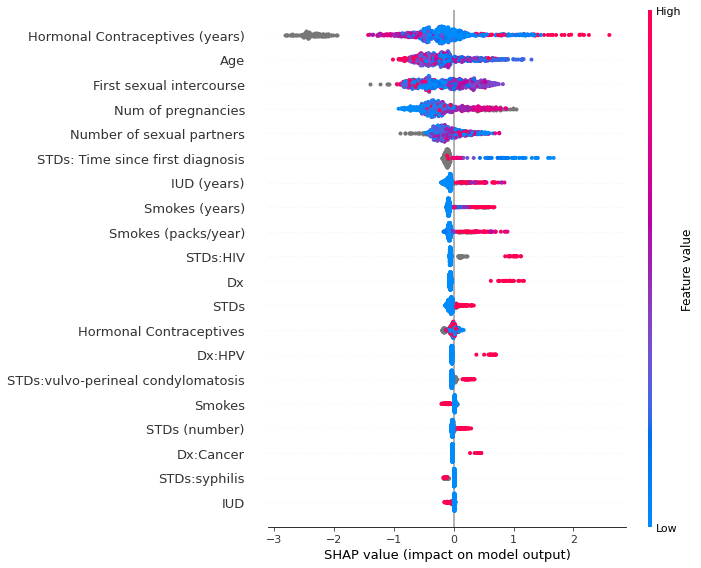

In [35]:
shap.summary_plot(shap_values, X)

In [36]:
explainer = shap.TreeExplainer(model)
expected_value = explainer.expected_value

In [52]:
target[:30]

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
23    1
24    0
25    0
26    0
27    0
28    0
29    0
Name: Biopsy, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

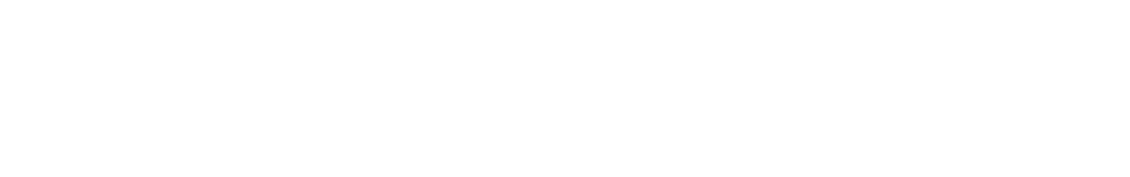

In [59]:
patient_id = 22

shap.force_plot(expected_value, shap_values[patient_id], X.iloc[patient_id], link='logit', matplotlib=True)

In [45]:
shap_values[patient_id].shape

(32,)

In [55]:
shap_values[patient_id]

array([-4.05233294e-01,  3.83190364e-01,  4.81239021e-01, -1.82642981e-01,
        1.65304691e-02, -5.79269566e-02, -2.15560291e-02,  4.24182899e-02,
        4.27545965e-01,  1.76918283e-02, -6.42916411e-02,  3.02121878e-01,
        2.55655944e-01,  1.35139912e-01,  0.00000000e+00,  8.68072602e-05,
        3.31355721e-01,  1.29577070e-02, -1.05184427e-05, -2.01646029e-03,
        4.73231303e-05,  0.00000000e+00, -4.98422869e-02,  5.65948103e-05,
        1.38361560e-04,  9.60761961e-03,  1.38880289e+00,  1.00117559e-02,
       -1.53297875e-02, -3.80634167e-03, -2.29330361e-02, -4.38168906e-02],
      dtype=float32)

In [57]:
X.iloc[patient_id].values

array([40.  ,  1.  , 18.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.25,
        0.  ,  0.  ,  1.  ,  2.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  2.  ,
        2.  ,  0.  ,  0.  ,  0.  ,  0.  ])